In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report 



In [3]:
df = pd.read_csv("C:\\Users\\Sarthak Tyagi\\Downloads\\Students Performance .csv")
df

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,19-22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,STUDENT142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,STUDENT143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,STUDENT144,19-22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [5]:
df.drop('Student_ID', axis='columns')

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,19-22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,19-22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          145 non-null    object
 1   Student_Age         145 non-null    object
 2   Sex                 145 non-null    object
 3   High_School_Type    145 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     145 non-null    object
 6   Sports_activity     145 non-null    object
 7   Transportation      145 non-null    object
 8   Weekly_Study_Hours  145 non-null    int64 
 9   Attendance          145 non-null    object
 10  Reading             145 non-null    object
 11  Notes               145 non-null    object
 12  Listening_in_Class  145 non-null    object
 13  Project_work        145 non-null    object
 14  Grade               145 non-null    object
dtypes: int64(1), object(14)
memory usage: 17.1+ KB


In [9]:
data_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
data_encoded

,Weekly_Study_Hours,Student_ID_STUDENT10,Student_ID_STUDENT100,Student_ID_STUDENT101,Student_ID_STUDENT102,Student_ID_STUDENT103,Student_ID_STUDENT104,Student_ID_STUDENT105,Student_ID_STUDENT106,Student_ID_STUDENT107,...,Listening_in_Class_No,Listening_in_Class_Yes,Project_work_Yes,Grade_BA,Grade_BB,Grade_CB,Grade_CC,Grade_DC,Grade_DD,Grade_Fail
0,0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
3,2,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,12,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
141,0,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
142,0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
143,12,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False


In [11]:
X = data_encoded.drop(['Grade_BA', 'Grade_BB', 'Grade_CB', 'Grade_CC', 'Grade_DC', 'Grade_DD', 'Grade_Fail'], axis=1)
y = data_encoded[['Grade_BA', 'Grade_BB', 'Grade_CB', 'Grade_CC', 'Grade_DC', 'Grade_DD', 'Grade_Fail']].idxmax(axis=1)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_classifier.predict(X_test)

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

C:\Users\Sarthak Tyagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sarthak Tyagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sarthak Tyagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [20]:
conf_matrix

array([[7, 0, 0, 0, 0, 0, 0],
       [6, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 1, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [21]:
class_report

'              precision    recall  f1-score   support\n\n    Grade_BA       0.25      1.00      0.40         7\n    Grade_BB       0.00      0.00      0.00         6\n    Grade_CB       0.00      0.00      0.00         3\n    Grade_CC       0.00      0.00      0.00         3\n    Grade_DC       0.00      0.00      0.00         4\n    Grade_DD       0.00      0.00      0.00         2\n  Grade_Fail       0.00      0.00      0.00         4\n\n    accuracy                           0.24        29\n   macro avg       0.04      0.14      0.06        29\nweighted avg       0.06      0.24      0.10        29\n'

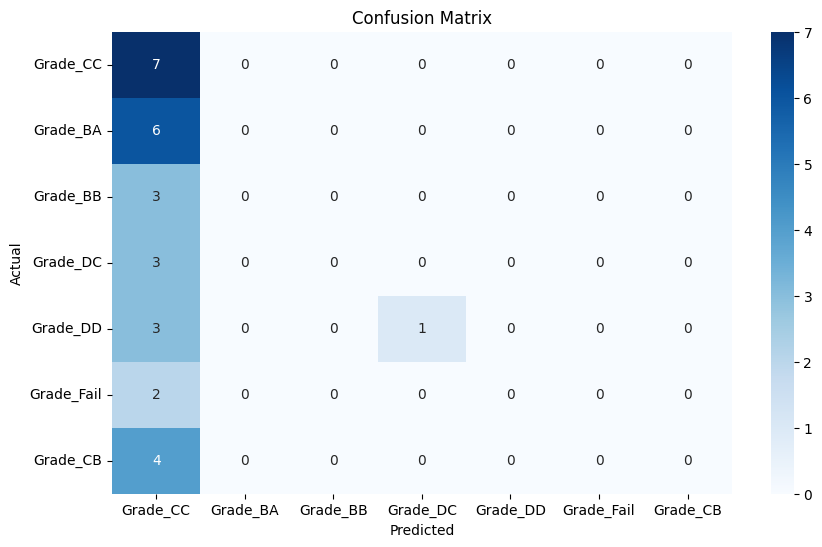

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()